## Content 

* [**About the Kernel**](#1)
* [**Refernces and Sources**](#2)
* [**Economic Breakdown of USA**](#3)
    * Corona Outbreak in USA
    * Gold VS Corona
    * SP 100 and NASDAQ
* [**Crude Oil Prices**](#4)
* [**Corona Vs Global Indices**](#5)

## About the kernel <a id="1"></a>

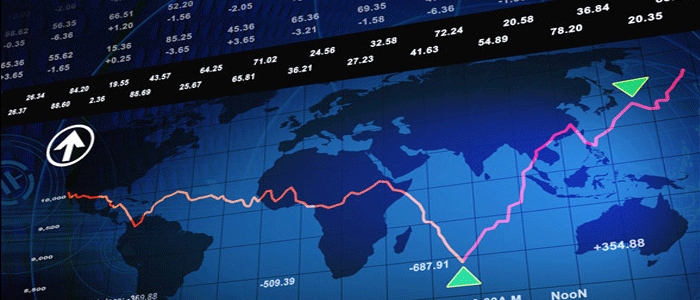

As our new financial year commences, the **Novel Coronavirus (COVID-19)** has infected more than thousand hundred thousand people in more than 150 countries  - a scourge confronting all of humanity, impacting lifestyles, businesses, economies, and the assumption of common well- being that all of us have largely taken for granted. 

While we are now focusing on securing the population from health hazards and on providing relief, especially to the poor, we also need to think long-term - to secure the health of the economy, the viability of businesses, and the livelihoods of people. Apart from providing robust safety nets for the vulnerable, ensuring job continuity and job creation is key. And there is an urgent need to mobilise resources to stimulate the economy. 

I have have put together this paper as a first attempt to address these issues.


## Reference and Sources  <a id="2"></a>

The data sets and the information used in Notebook were inferred from
        * investing.com
        * Economictimes
        * Potential Impact of Covid19 on the Indian Economy - KPMG 

### Importing the necessary packages and Reading the files

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Economic Breakdown of USA <a id="3"></a>

In [ ]:
gold_df = pd.read_csv("/kaggle/input/economycovid19/gold price.csv")
gold_df.describe()

#### About the Data

**gold_df** contains the data of gold prices from the period of 2007  - March 2020

In [ ]:
fig = px.line(gold_df, x='date', y=' value' , title="Price of Gold over the period of 2007 - 2020")
fig.show()

#### Observation:

As we can clearly see that the prices of the gold are declining now, lets see the impact of corona on gold market

In [ ]:
gold_df["date"] = pd.to_datetime(gold_df['date'])  
mask = (gold_df['date'] > '2019-12-01') 
temp_df = gold_df.loc[mask]
train_df= pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/train.csv")

### Corona Outbreak in USA

In [ ]:
temp = train_df.loc[(train_df["Country_Region"]=="US")].groupby(["Date"])["ConfirmedCases"].sum().reset_index()
fig = px.bar(temp, x='Date', y='ConfirmedCases',
             hover_data=['ConfirmedCases'], color='ConfirmedCases',
             labels={'pop':'Total Number of confirmed Cases'}, height=400)
fig.update_layout(
    title_text="Corona Outbreak in USA")
fig.show()

### Gold VS Corona

In [ ]:
trace1 = go.Scatter(
    x=temp_df["date"],
    y=temp_df[" value"],
    name = "Price of Gold in USA"
)
trace2 = go.Bar(
    x=temp["Date"],
    y=temp["ConfirmedCases"],
    xaxis="x2",
    yaxis="y2",
    name = "Confirmed Cases in USA"
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    yaxis2=dict(
        anchor="x2"
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Observation:

#### We can see from the graph that from March 10,2020 the corona cases has started to spike in USA and from the next the gold price has faced a huge downfall.

### Sp 100 and NASDAQ

#### SP 100:

The S&P 100 Index is a stock market index of United States stocks maintained by Standard & Poor's. Index options on the S&P 100 are traded with the ticker symbol "OEX". Because of the popularity of these options, investors often refer to the index by its ticker symbol.


In [ ]:
sp_historic = pd.read_csv("/kaggle/input/economycovid19/S  P 500 - Sheet1.csv")
sp_lm = pd.read_csv("/kaggle/input/monthly/SP Monthly - Sheet1.csv")
nasdaq_historic = pd.read_csv("/kaggle/input/economycovid19/Nasdaq 100 - Sheet1.csv")
nasdaq_lm = pd.read_csv("/kaggle/input/monthly/Nasdaq Monthly - Sheet1.csv")

In [ ]:
fig = px.line(sp_historic[::-1], x='Date', y='Price' , title="SP stock prices over Mar'13 - Mar'20")
fig.show()

In [ ]:
sp_lm = sp_lm[3:]
trace1 = go.Scatter(
    x=sp_lm["Date"],
    y=sp_lm["Price"],
    name = "S&P"
)
trace2 = go.Scatter(
    x=nasdaq_lm[::-1]["Date"],
    y=nasdaq_lm[::-1]["Price"],
    xaxis="x2",
    yaxis="y2",
    name = "NASDAQ"
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    yaxis2=dict(
        anchor="x2"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

### Observation

* We can see clearly the corona virus had hit strongly on the USA stock price.
* The stock prices started falling down from Mar,11 the next day after corona outbreak.
* The current prices of stocks in both SP and NASDAQ are less than the highest price of the previous month


#### NASDAQ

The NASDAQ Composite is a stock market index of the common stocks and similar securities listed on the Nasdaq stock market. Along with the Dow Jones Industrial Average and S&P 500 it is one of the three most-followed indices in US stock markets.

### As of 4th April it is speculated there are 1 million job losses in USA

## Crude Oil Prices <a id="5"></a>

To compound the global economic uncertainty, an ill-timed global crude oil war has begun. The demand by Organisation of Petroleum Exporting Countries (OPEC) to further restrict production from April was rejected by Russia, resulting in the scrapping of existing restrictions. Increasing production at a time when demand is low due to the Covid-19 pandemic is bad for the crude oil market.

In [ ]:
crude_oil = pd.read_csv("/kaggle/input/economycovid19/Crude Oil Prices  - Sheet1.csv")

fig = px.line(crude_oil[:20][::-1], x='Date', y='Price' , title="Crude oil Prices")
fig.show()

## Corona Vs Global Indices <a id="5"></a>

In [ ]:
Country=pd.DataFrame()
#temp = train_df.groupby(["Country/Region"])["ConfirmedCases"].sum().reset_index()
temp = train_df.loc[train_df["Date"]==train_df["Date"][len(train_df)-1]].groupby(['Country_Region'])["ConfirmedCases"].sum().reset_index()
Country['Name']=temp["Country_Region"]
Country['Values']=temp["ConfirmedCases"]

fig = px.choropleth(Country, locations='Name',
                    locationmode='country names',
                    color="Values")
fig.update_layout(title="Corona spread on 04-04-2020")
fig.show()

### Global Indices

In [ ]:
global_indices = pd.read_csv("/kaggle/input/economycovid19/Global Indices Performance - Sheet1.csv")
global_indices["Country"] = global_indices["Name"].str.split(' ').str[1]
global_indices

fig = px.choropleth(global_indices, locations='Country',
                    locationmode='country names',
                    color="1 Month")
fig.update_layout(title="Change in the indices for the last month")
fig.show()

### I will be comparing the current recession with the previous one and figure how long we have taken to over come one and how long will we take for the current recession..

## Stay tuned for more Updates

## Please upvote if you find the kernel useful